In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [10]:
# Загрузка данных из csv
# train_df = pd.read_csv('train_edit3.csv')
# valid_df = pd.read_csv('valid_edit3.csv')

train_df = pd.read_csv("../AC/trein.csv")
valid_df = pd.read_csv("../AC/val.csv")

# Глянем на строки данных
print(train_df.head())
print('--------------------------------')

print(valid_df.head())

   report_date  client_id  target  col1453  col1454  col1455  col1456  \
0           20       8302       0        0     4698      0.0      0.0   
1           24       8296       0        0     4422      0.0      0.0   
2           23       8294       0        1     4217      0.0      0.0   
3           22       8289       0        0     3931      0.0      0.0   
4           16       8279       0        0     3478      0.0      0.0   

   col1457  col1458  col1459  ...  col2588  col2589  col2590    col2654  \
0      0.0      0.0      1.0  ...    360.0    360.0    360.0  8577000.0   
1      0.0      0.0      1.0  ...    180.0    180.0    180.0  3300000.0   
2      0.0      0.0      0.0  ...    300.0    300.0    300.0  6868510.0   
3      0.0      0.0      0.0  ...    360.0    360.0    360.0  3000000.0   
4      0.0      0.0      1.0  ...    360.0    360.0    360.0  3000000.0   

     col2655    col2656    col2660    col2661    col2662   col2663  
0  8577000.0  8577000.0  8577000.0  85770

In [11]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']

print(f"Обучающая выборка: {X_train.shape}, {y_train.shape}")
print(f"Тестовая выборка: {X_val.shape}, {y_val.shape}")

Обучающая выборка: (4817, 272), (4817,)
Тестовая выборка: (3642, 272), (3642,)


In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

#Предсказание вероятностей для тестовой выборки
y_prob = model.predict_proba(X_val)[:, 1]

c:\Users\Vlad\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Посторем ROC-кривую

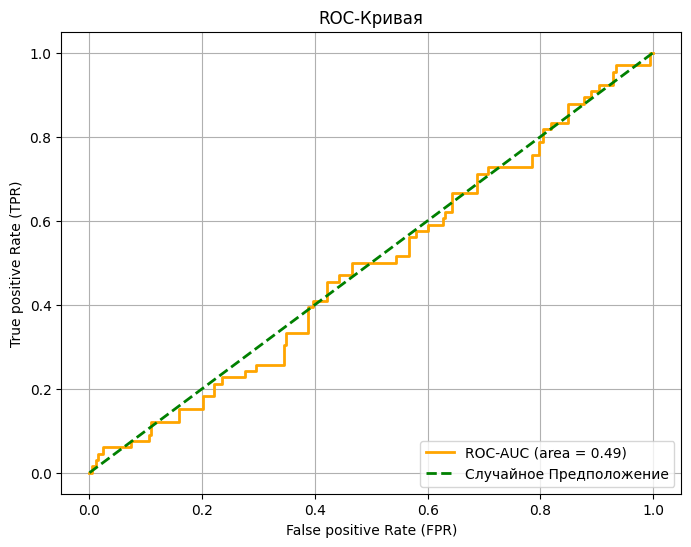

Значение ROC-AUC (area = 0.49)


In [13]:
fpr, tpr, trashers = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color = 'green', lw=2, linestyle='--', label='Случайное Предположение')
plt.xlabel('False positive Rate (FPR)')
plt.ylabel('True positive Rate (TPR)')
plt.title('ROC-Кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f'Значение ROC-AUC (area = {roc_auc:.2f})')